# Решение задачи сегментации повреждений без ML

В качестве базового подхода в проекте будем использовать метод, основанный на анализе градиентной информации с применением оператора Лапласа. Этот метод предполагает предварительное усиление локального контраста изображения с помощью алгоритма CLAHE, преобразование в градации серого и последующее вычисление карты резких перепадов яркости. В результате формируется маска предполагаемых повреждений. Такой подход прост в реализации и не требует обучающих данных.

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Функция для распознвания повреждений

In [ ]:
def detect_damage_strong(img_bgr):
    lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    enhanced = cv2.merge((cl, a, b))
    img_clahe = cv2.cvtColor(enhanced, cv2.COLOR_LAB2BGR)

    img_gray = cv2.cvtColor(img_clahe, cv2.COLOR_BGR2GRAY)

    lap = cv2.Laplacian(img_gray, cv2.CV_64F)
    abs_lap = cv2.convertScaleAbs(lap)

    _, thresh = cv2.threshold(abs_lap, 20, 255, cv2.THRESH_BINARY)
    mask = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

    return mask, abs_lap


Читаем изображения и определяем повреждения

In [ ]:
img_1 = cv2.imread('./images_no_ML/Car-damages-487_png.rf.d09e03c3295eb1f6f766da45a3f203a8.jpg')
img_2 = cv2.imread('./images_no_ML/Car-damages-502_png.rf.bf8f1bce13f8f1e21772f1c8296d20ed.jpg')
img_3 = cv2.imread('./images_no_ML/Car-damages-617_png.rf.8cc0a058f6bf43a26242b964c7a0d19f.jpg')
img_4 = cv2.imread('./images_no_ML/Car-damages-622_png.rf.4a601c2cf6f6b03fb20c52ea204c1576.jpg')
img_5 = cv2.imread('./images_no_ML/Car-damages-649_png.rf.4a7ccc3c344789387fd85c0aebf128bc.jpg')

mask_1, abs_lap_1 = detect_damage_strong(img_1)
mask_2, abs_lap_2 = detect_damage_strong(img_2)
mask_3, abs_lap_3 = detect_damage_strong(img_3)
mask_4, abs_lap_4 = detect_damage_strong(img_4)
mask_5, abs_lap_5 = detect_damage_strong(img_5)

Визуализируем 5 обработанных изображений

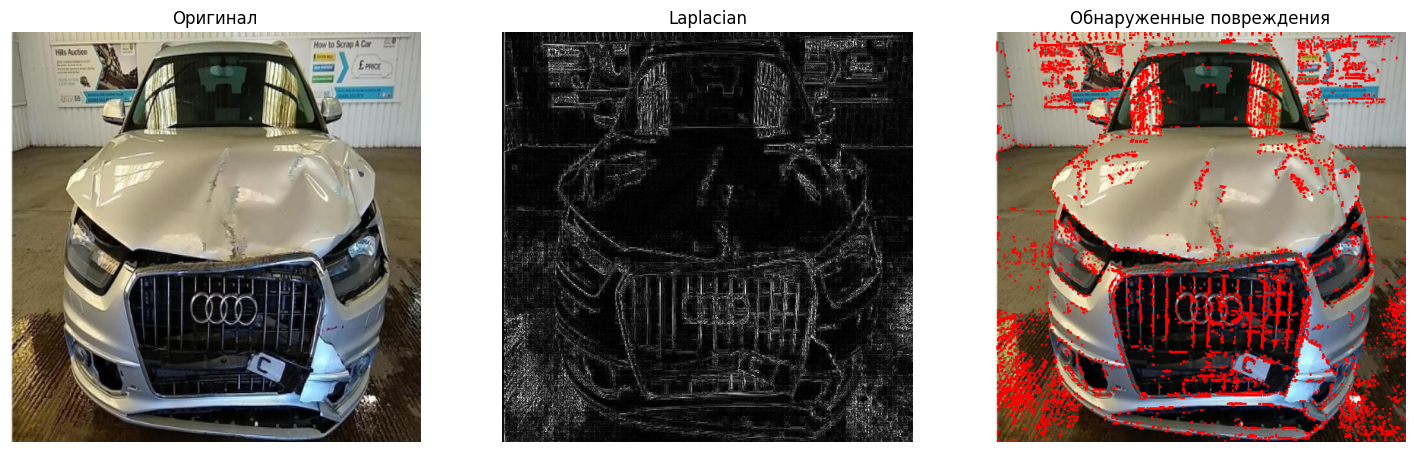

In [18]:
overlay_1 = img_1.copy()
overlay_1[mask_1 > 0] = [0, 0, 255]

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('Оригинал')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Laplacian')
plt.imshow(abs_lap_1, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Обнаруженные повреждения')
plt.imshow(cv2.cvtColor(overlay_1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

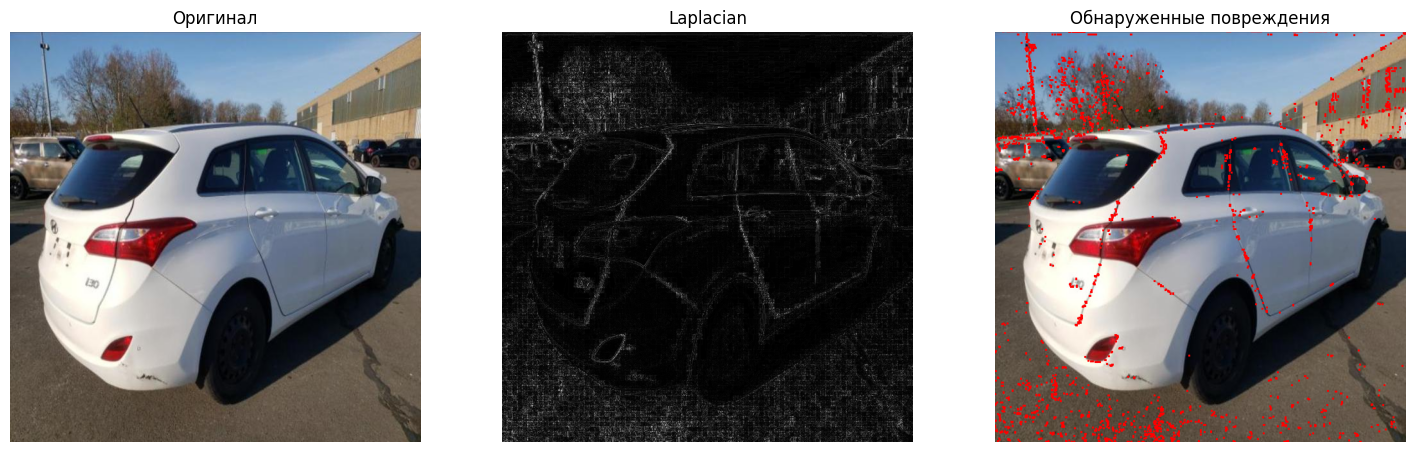

In [19]:
overlay_2 = img_2.copy()
overlay_2[mask_2 > 0] = [0, 0, 255]

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('Оригинал')
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Laplacian')
plt.imshow(abs_lap_2, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Обнаруженные повреждения')
plt.imshow(cv2.cvtColor(overlay_2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

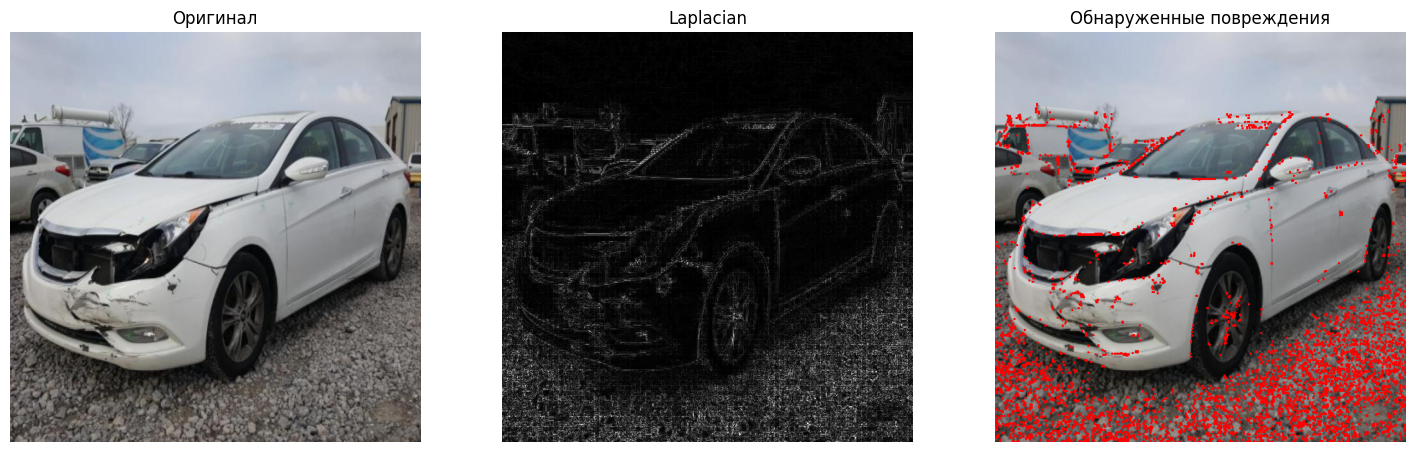

In [20]:
overlay_3 = img_3.copy()
overlay_3[mask_3 > 0] = [0, 0, 255]

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('Оригинал')
plt.imshow(cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Laplacian')
plt.imshow(abs_lap_3, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Обнаруженные повреждения')
plt.imshow(cv2.cvtColor(overlay_3, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

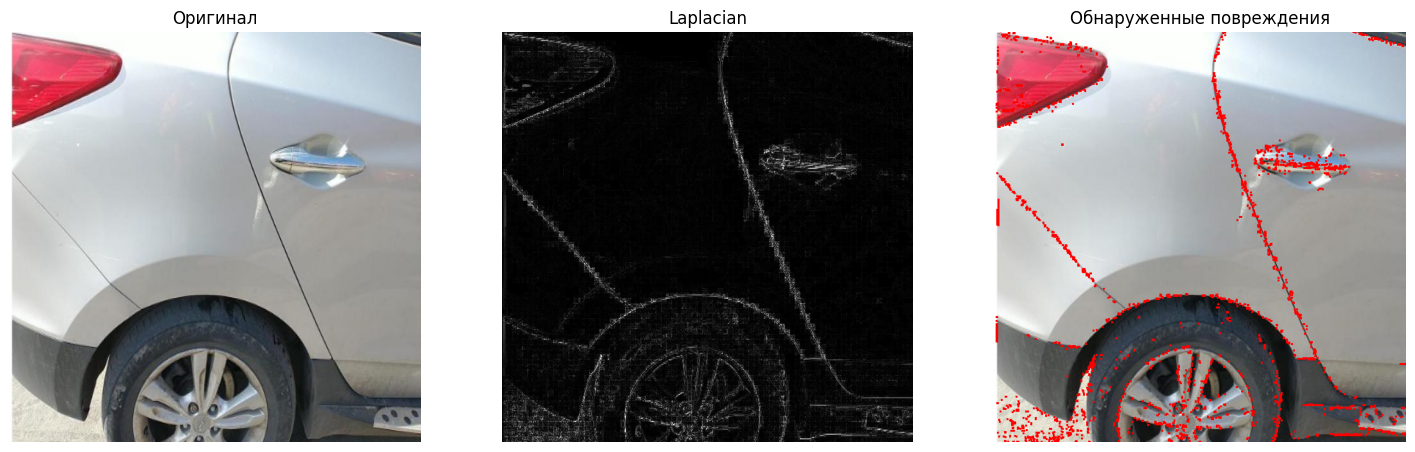

In [21]:
overlay_4 = img_4.copy()
overlay_4[mask_4 > 0] = [0, 0, 255]

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('Оригинал')
plt.imshow(cv2.cvtColor(img_4, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Laplacian')
plt.imshow(abs_lap_4, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Обнаруженные повреждения')
plt.imshow(cv2.cvtColor(overlay_4, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

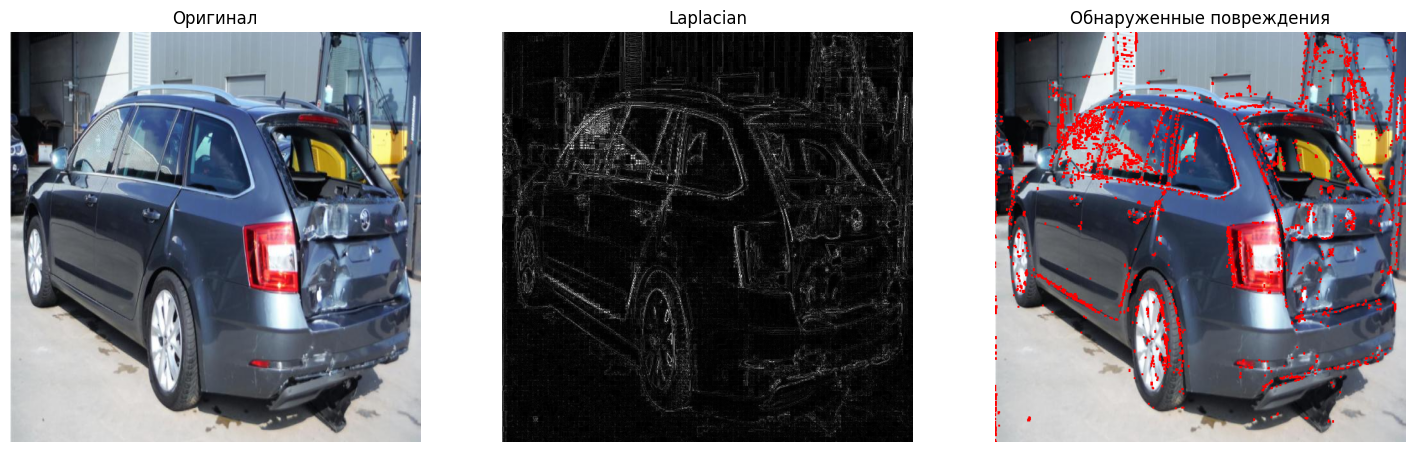

In [23]:
overlay_5 = img_5.copy()
overlay_5[mask_5 > 0] = [0, 0, 255]

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('Оригинал')
plt.imshow(cv2.cvtColor(img_5, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Laplacian')
plt.imshow(abs_lap_5, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Обнаруженные повреждения')
plt.imshow(cv2.cvtColor(overlay_5, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

Видим, что данный метод практически не способен надёжно выделять реальные повреждения на кузове автомобиля. Метод особенно чувствителен к стыкам и швам между элементами кузова, которые имеют выраженные контуры, в то время как сами повреждения — особенно те, что представлены в виде мягких вмятин или локальных искажений формы — зачастую остаются незамеченными. Даже крупные повреждения обнаруживаются слабо или частично, если они не сопровождаются резкими границами
